## In Class Jupyter Assignment #2
### Brooks Tawil


Create the three clusters of data ${x_i^j}_{i=1}^{1000} iid N(mu_j,sigma_j), j = 1,2,3$

$mu_1 = [1, 0]$
$sigma_1 = U Lambda_1 U^{T}$
$mu_2 = [-1, 0]$
$sigma_2 = U Lambda_2 U^{T}$
$mu_3 = [0, -10]$
$sigma_3 = I$

$U = [[1/sqrt(2) -1/sqrt(2)][1/sqrt(2) 1/sqrt(2)]$

$Lambda_1 = [[4, 0] [0, 1]]$
$Lambda_2 = [[1, 0] [0, 5]]$


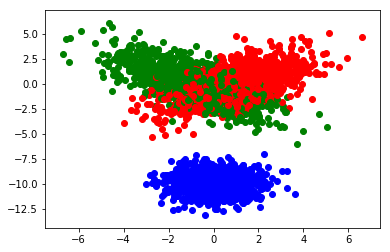

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the variables
Mu_1 = np.array([1, 0])
Mu_2 = np.array([-1, 0])
Mu_3 = np.array([0, -10])

Lambda_1 = np.array([np.array([4, 0]), np.array([0, 1])])
Lambda_2 = np.array([np.array([1, 0]), np.array([0, 5])])

U = np.array([np.array([np.divide(1, np.sqrt(2)), np.divide(-1, np.sqrt(2))]), np.array([np.divide(1, np.sqrt(2)), np.divide(1, np.sqrt(2))])])

'''
print (Mu_1)
print (Mu_2)
print (Mu_3)

print (Lambda_1)
print (Lambda_2)

print (U)

print ()
'''

# Calculate the sigmas
Sigma_1 = U @ Lambda_1 @ U.T
Sigma_2 = U @ Lambda_2 @ U.T
Sigma_3 = np.identity(2)

'''
print (Sigma_1)
print (Sigma_2)
print (Sigma_3)


print (Sigma_1)
print (Sigma_2)
print (Sigma_3)
'''

mus = [Mu_1, Mu_2, Mu_3]
sigmas = [Sigma_1, Sigma_2, Sigma_3]

Clusters = [[0] * 1000, [0] * 1000, [0] * 1000]

# Generate the clusters
# j=1 Red, j=2 Green, j=3 Blue
for i in range(3):
    for j in range(1000):
        Clusters[i][j] = np.random.multivariate_normal(mus[i], sigmas[i])

        
Clusters = np.array(Clusters)

'''
print (Clusters.shape)
print (Clusters)
print (Clusters[i])
'''

plt.figure()
for j in range(1000):
    plt.scatter(Clusters[0][j][0], Clusters[0][j][1], c="r")
    plt.scatter(Clusters[1][j][0], Clusters[1][j][1], c="g")
    plt.scatter(Clusters[2][j][0], Clusters[2][j][1], c="b")
plt.show()


(3000, 2)


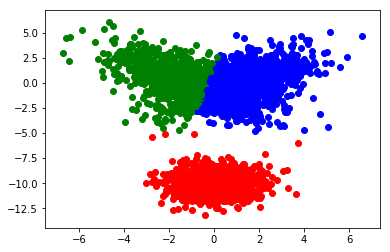

In [12]:
# K means clustering for k=3
# Combine all of the data into one data set
import random

data = []
cluster_assign = []

for i in range(3):
    for j in range(1000):
        data.append(Clusters[i][j])

data = np.array(data)
print (data.shape)

# Randomly assign to a cluster
for i in range(len(data)):
    cluster_assign.append(random.randint(0,2))

cluster_assign = np.array(cluster_assign)

# With cluster assignements made, make a while loop that:
    # Computes the mean for each centroid
    # Computes distance of each point to each mean
    # Reassign that point to the close mean
done = False

centroid_mean_xs = [0, 0, 0]
centroid_mean_ys = [0, 0, 0]
    
while (not done):
    oneReassigned = False
    # Compute mean for centroids
    centroid_sums_xs = [0, 0, 0]
    centroid_sums_ys = [0, 0, 0]
    amt_sums = [0, 0, 0]
    for i in range(len(cluster_assign)):
        if(cluster_assign[i] == 0): 
            centroid_sums_xs[0] += data[i][0]
            centroid_sums_ys[0] += data[i][1]
            amt_sums[0] += 1
        if(cluster_assign[i] == 1): 
            centroid_sums_xs[1] += data[i][0]
            centroid_sums_ys[1] += data[i][1]
            amt_sums[1] += 1
        if(cluster_assign[i] == 2): 
            centroid_sums_xs[2] += data[i][0]
            centroid_sums_ys[2] += data[i][1]
            amt_sums[2] += 1
    
    for i in range(3):
        centroid_mean_xs[i] = centroid_sums_xs[i]/amt_sums[i]
        centroid_mean_ys[i] = centroid_sums_ys[i]/amt_sums[i]
        
    # With the means compute, calculate each points distance to the means, reassign if necessary
    for j in range(len(data)):
        distances = [0, 0, 0]
        x_diff = 0
        y_diff = 0
        
        # Calculate distances from the means
        for i in range(3):
            x_diff = centroid_mean_xs[i] - data[j][0]
            y_diff = centroid_mean_ys[i] - data[j][1]
            distances[i] = np.square(x_diff**2 + y_diff**2)
                    
        # Reassign if necessary
        minDistance = np.inf
        closestCentroid = -1
        for i in range(3):
            if distances[i] < minDistance:
                minDistance = distances[i]
                closestCentroid = i
            
        if(closestCentroid != cluster_assign[j]):
            oneReassigned = True
            cluster_assign[j] = closestCentroid            
    
    if(not oneReassigned):
        done = True
        
plt.figure()
for j in range(len(data)):
    if (cluster_assign[j] == 0):
        plt.scatter(data[j][0], data[j][1], c="r")
    elif(cluster_assign[j] == 1):
        plt.scatter(data[j][0], data[j][1], c="g")
    elif(cluster_assign[j] == 2):
        plt.scatter(data[j][0], data[j][1], c="b")
plt.show()
